In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Sales & Marketing Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,4800000.0,60,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,6000000.0,50,Sales & Marketing Series,Sales Forecasting: for Sales Target Results,Powerful Closing Technique,Sales Forecasting: for Sales Target Results


In [3]:
df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_ID", "discount_training", "training_price", "total_payment", "brand_sustainability", 
    "upselling"
], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   company_field                                5000 non-null   object
 1   level_training_process                       5000 non-null   int64 
 2   purchasing_time_patterns                     5000 non-null   object
 3   number_of_participants                       5000 non-null   int64 
 4   group                                        5000 non-null   object
 5   satisfaction                                 5000 non-null   int64 
 6   communication_channel                        5000 non-null   object
 7   complaints                                   5000 non-null   object
 8   communication_quality                        5000 non-null   object
 9   possibility_of_purchasing_the_same_training  5000 non-null   int64 
 10  frequency_en

In [4]:
df["cross_selling"].value_counts()

Powerful Closing Technique                           626
Sales Forecasting: for Sales Target Results          626
Professional Selling Skills                          626
Marketing Research For Business Using SPSS           626
Advanced Digital Marketing & Foundation              624
Optimizing in Growing Your Business                  624
Presentation & Selling Skills Using Story-Telling    624
Social Selling: Optimizing Engagement                624
Name: cross_selling, dtype: int64

In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object" :
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = MinMaxScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,interest_in_discount_program,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_type,training_name,cross_selling
0,1.0,0.684211,1.0,0.921348,1.0,1.00,1.0,1.000000,4,1,0,2,2,0,1,3,0,6,3
1,1.0,0.736842,1.0,0.898876,1.0,1.00,1.0,1.000000,1,1,0,2,2,0,1,6,0,6,3
2,1.0,0.526316,1.0,0.943820,1.0,0.75,1.0,0.727273,14,1,0,2,2,0,1,3,0,6,3
3,1.0,1.000000,1.0,0.932584,1.0,1.00,1.0,1.000000,12,1,0,2,2,0,1,6,0,6,3
4,1.0,0.842105,1.0,0.988764,1.0,1.00,1.0,1.000000,10,1,0,2,2,0,1,2,0,6,3


In [6]:
X = df2.drop("cross_selling", axis=1)
y = df2["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 18), (1000, 18), (4000,), (1000,))

In [7]:
y.value_counts()

3    626
6    626
5    626
1    626
0    624
2    624
4    624
7    624
Name: cross_selling, dtype: int64

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

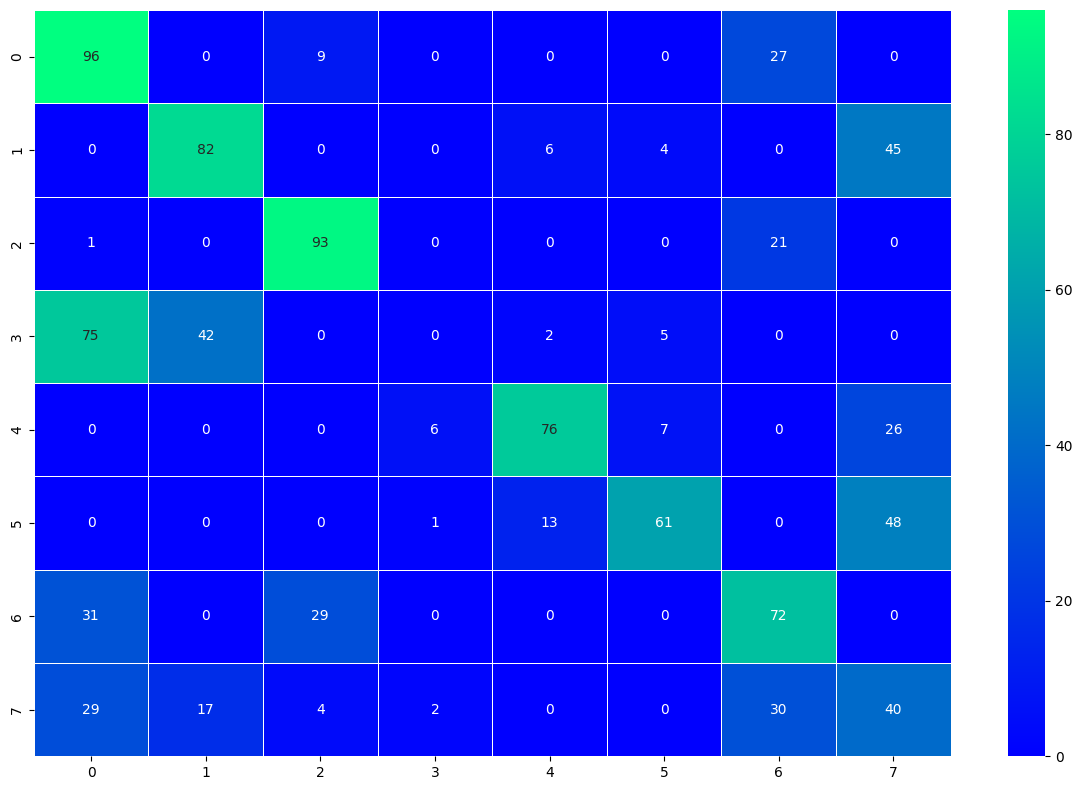

In [9]:
y_pred = model.predict(X_test)
confuse = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(confuse, annot=True, cmap="winter", linecolor="white", linewidths=.5, ax=ax)
plt.tight_layout()
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.73      0.53       132
           1       0.58      0.60      0.59       137
           2       0.69      0.81      0.74       115
           3       0.00      0.00      0.00       124
           4       0.78      0.66      0.72       115
           5       0.79      0.50      0.61       123
           6       0.48      0.55      0.51       132
           7       0.25      0.33      0.28       122

    accuracy                           0.52      1000
   macro avg       0.50      0.52      0.50      1000
weighted avg       0.50      0.52      0.50      1000



In [11]:
accuracy = accuracy_score(y_test, y_pred)
presisi = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")
print(
    f"""
    Accuracy : {accuracy:.3f}
    Precision_Score : {presisi:.3f}
    Recall_Score : {recall:.3f}
    F1_Score : {f1:.3f}
    """
)


    Accuracy : 0.520
    Precision_Score : 0.520
    Recall_Score : 0.520
    F1_Score : 0.520
    


In [12]:
test = X_test.iloc[-1:]
test

,level_training_process,number_of_participants,satisfaction,possibility_of_purchasing_the_same_training,frequency_engagement,rating_training,interest_in_discount_program,training_total_meetings,company_field,purchasing_time_patterns,group,communication_channel,complaints,communication_quality,tren_mode_factor,trainer_name,training_type,training_name
1926,0.25,0.578947,0.25,0.089888,0.0,1.0,0.0,1.0,1,0,1,0,0,1,0,6,0,1


In [13]:
model.predict(test)

array([4])

In [14]:
predict_proba = model.predict_proba(test)[0]
for i, j in enumerate(predict_proba):
    print(i, j)

0 0.0
1 8.355541137325724e-14
2 0.0
3 5.141571334971294e-07
4 0.683035949920941
5 0.3169635359218419
6 0.0
7 3.4360175520823747e-23
